In [1]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt #used to generate the legends
from typing import List

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension:  prova


Current folders are:
prova.0


### uncomment to show all the rows in tables

In [2]:
#display all the rows of the dataframe  
pd.set_option('display.max_rows', None)

# creation of firm dataframes

In [3]:
#each firm will have its dataframe
#containing the values of the names of the columns for all the time units (rows)
colNames=["firm class type", "initial inventories","total costs", "final inventories","profits", "added value",\
          "total production", "cost of production", "cost of unused factors","total lost production", \
          "total cost of lost production", "cost of labor", "cost of capital", "capital quantity dynamic", "production type"]

#fileNameArray is the array that will contain the names of the file of the balance sheets (one file for each firm), 
#subdivided by ranks in the columns of the array; 'itemsize=len(fileNameRoot)+30' is supposed to be sufficient to 
#report the names of the file;
fileNameArray=np.chararray((ag0num, rankNum), itemsize=len(fileNameRoot)+30, unicode=True)

In [4]:
#operating by folders to load the names of the files reported in the balancesheetList files
for k in range(rankNum):
    #which folder
    os.chdir("../"+folder+"."+str(k))
    with open(fileNameRoot+"_balancesheetList_"+str(k)+".csv","r") as fileList:
        reader = csv.reader(fileList, delimiter = ',')
        #read the name of the files, containing _balancesheetList_, present in the current set of folders
        for row in reader:
            for i in range(len(row)):
                fileNameArray[i,k]=row[i]

                

In [5]:
#creating a dictionary of firm dataframes
firmData={}
for k in range(rankNum):
    #in the folder with name extension == k
    os.chdir("../"+folder+"."+str(k))
    #repeating for the number of agent type 0 in each folder
    for i in range(ag0num):
        #extracting the agent uid from the name of the file
        p1=fileNameArray[i,k].find('(')
        p2=fileNameArray[i,k].find(')')+1
        uid=fileNameArray[i,k][p1:p2]
        #filling the dictionary with uids as keys and the balancesheetLists of the related firm as values
        firmData[uid]=pd.read_csv(fileNameArray[i,k], header=None)

#naming the firm dataframe columns, firm by firm, by scrolling the keys of the dictionary
for aFirm in firmData.keys():
    firmData[aFirm].columns=colNames

# Retrieve a firm

In [6]:
#retrieve a firm with id and rank
def retrieveFirmBalancesheet(id,r):
    return firmData['('+str(id)+', 0, '+str(r)+')']

In [7]:
#example
retrieveFirmBalancesheet(1,0)

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,capital quantity dynamic,production type
0,0.0,0.000000,176.318139,11.050000,-165.268139,11.050000,2.382448,8.500000,167.818139,0.0,0.0,79.0,97.318139,0.000000,1.0
1,0.0,11.050000,176.318139,33.150000,-154.218139,22.100000,4.426950,17.000000,159.318139,0.0,0.0,79.0,97.318139,0.000000,1.0
2,0.0,33.150000,176.318139,58.933333,-150.534806,25.783333,5.125447,19.833333,156.484806,0.0,0.0,79.0,97.318139,0.000000,1.0
3,0.0,58.933333,176.318139,114.183333,-121.068139,55.250000,11.267702,42.500000,133.818139,0.0,0.0,79.0,97.318139,0.000000,1.0
4,0.0,114.183333,176.318139,209.950000,-80.551472,95.766667,19.900210,73.666667,102.651472,0.0,0.0,79.0,97.318139,0.000000,1.0
5,0.0,209.950000,176.318139,313.083333,-73.184806,103.133333,20.965659,79.333333,96.984806,0.0,0.0,79.0,97.318139,0.000000,1.0
6,0.0,313.083333,176.318139,456.733333,-32.668139,143.650000,29.315924,110.500000,65.818139,0.0,0.0,79.0,97.318139,0.000000,1.0
7,0.0,456.733333,176.318139,618.800000,-14.251472,162.066667,33.045552,124.666667,51.651472,0.0,0.0,79.0,97.318139,0.000000,1.0
8,0.0,618.800000,176.318139,784.550000,-10.568139,165.750000,33.509201,127.500000,48.818139,0.0,0.0,79.0,97.318139,0.000000,1.0
9,0.0,784.550000,176.318139,965.033333,4.165194,180.483333,36.128276,138.833333,37.484806,0.0,0.0,79.0,97.318139,0.000000,1.0


# The allFirmData dataframe

In [8]:
#create a dataframe summing up all the firm dataframes
allFirmData=firmData[list(firmData.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                      #independent copy with a new name

for aFirmUid in list(firmData.keys())[1:]: #from the second to the last
    allFirmData=allFirmData.add(firmData[aFirmUid])

allFirmData.__description__="all firms"

In [9]:
allFirmData

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,capital quantity dynamic,production type
0,215.0,0.000000,4879.231998,1262.318056,-3616.913942,1262.318056,291.144678,1001.930556,3877.301442,0.0,0.0,2067.0,2812.231998,0.000000,10.0
1,215.0,1262.318056,4879.231998,3647.975000,-2493.575053,2385.656944,548.818914,1892.319444,2986.912553,0.0,0.0,2067.0,2812.231998,0.000000,10.0
2,215.0,3647.975000,4879.231998,6808.452778,-1718.754220,3160.477778,718.915000,2491.111111,2388.120887,0.0,0.0,2067.0,2812.231998,0.000000,10.0
3,215.0,6808.452778,4879.231998,10502.465278,-1185.219498,3694.012500,835.071316,2907.152778,1972.079220,0.0,0.0,2067.0,2812.231998,0.000000,10.0
4,215.0,10502.465278,4879.231998,14437.770833,-943.926442,3935.305556,877.647021,3082.500000,1796.731998,0.0,0.0,2067.0,2812.231998,0.000000,10.0
5,215.0,14437.770833,4879.231998,18583.530556,-733.472276,4145.759722,923.447414,3254.680556,1624.551442,0.0,0.0,2092.0,2812.231998,0.000000,10.0
6,215.0,18583.530556,4904.231998,22954.950000,-532.812553,4371.419444,969.380949,3432.305556,1471.926442,0.0,0.0,2097.0,2822.924989,887.607719,10.0
7,215.0,22954.950000,4922.837307,27298.533333,-579.253974,4343.583333,958.596754,3403.666667,1519.170640,0.0,0.0,2125.0,2831.931131,787.053840,10.0
8,215.0,27298.533333,4962.954151,31736.311111,-525.176374,4437.777778,982.017260,3481.833333,1481.120818,0.0,0.0,2157.0,2853.318870,1546.054060,10.0
9,215.0,31736.311111,5018.702805,36073.462500,-681.551416,4337.151389,956.418740,3400.930556,1617.772249,0.0,0.0,2170.0,2861.542875,1197.362395,10.0


In [10]:
allFirmData.__description__

'all firms'

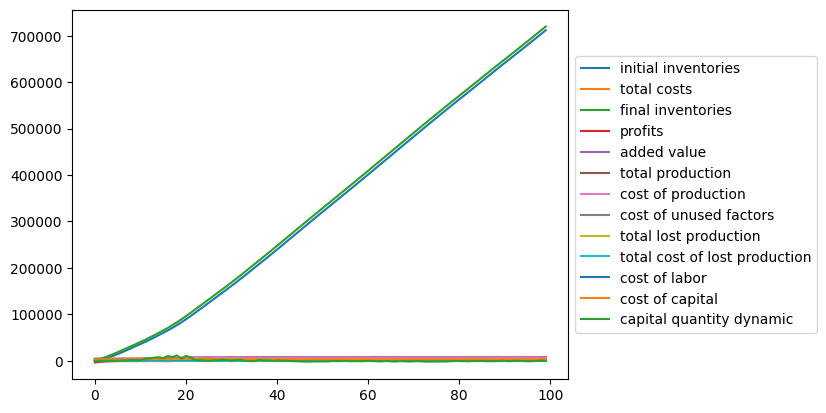

In [11]:
allFirmData.drop(['firm class type', 'production type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<Axes: >

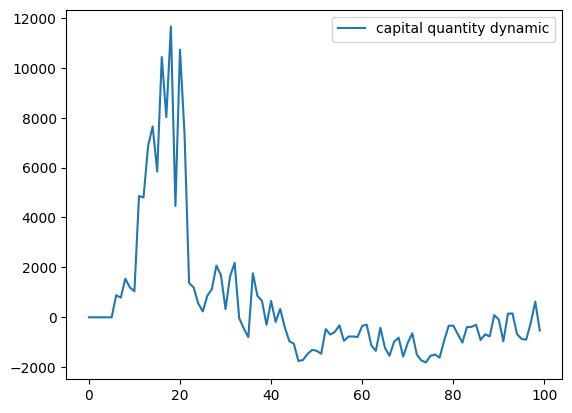

In [12]:
allFirmData[['capital quantity dynamic']].plot()

<Axes: >

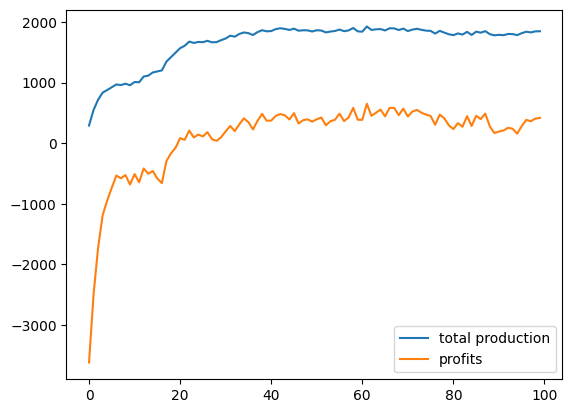

In [13]:
allFirmData[['total production', 'profits']].plot()

<Axes: >

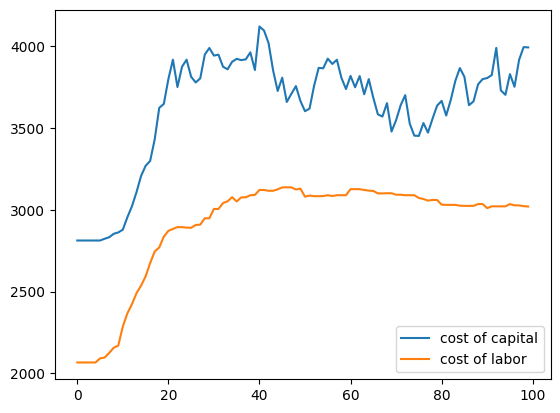

In [14]:
allFirmData[['cost of capital','cost of labor']].plot()

<Axes: >

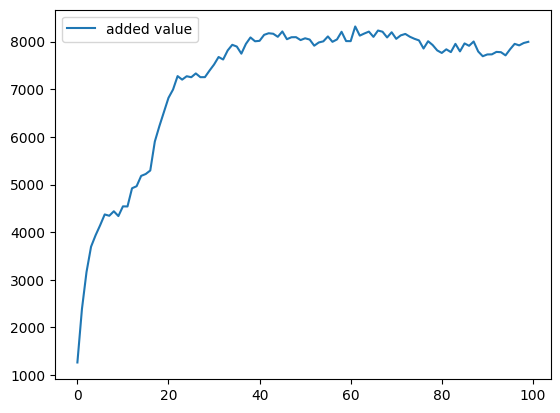

In [15]:
allFirmData[['added value']].plot()

# Considering groups of firms

In [16]:
#summarize a subset of balancesheets of firm with 'dimensional class' in a given list
def sumBalancesheetsWithAGivenDimensionalClass(dimClassList: List):
    tmpDict={}
    for aFirmUid in list(firmData.keys())[:]:
        if firmData[aFirmUid]['firm class type'].loc[0] in dimClassList:
            tmpDict[aFirmUid]=firmData[aFirmUid]
    print("found",len(tmpDict), "firms")
    
    if tmpDict=={}: return 0 #firms with the required dimensional class: not found
        
    allLocalFirmData=tmpDict[list(tmpDict.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                              #independent copy with a new name

    for aFirmUid in list(tmpDict.keys())[1:]: #from the second to the last
        allLocalFirmData=allLocalFirmData.add(tmpDict[aFirmUid])

    memo="firms of groups"
    for g in dimClassList: memo = memo +" "+str(g)
    allLocalFirmData.__description__= memo
    
    return allLocalFirmData


In [17]:
#example with dimensional class 0
sumOfBalanceSheetSubset = sumBalancesheetsWithAGivenDimensionalClass([0])

found 10 firms


In [18]:
sumOfBalanceSheetSubset.__description__

'firms of groups 0'

In [19]:
sumOfBalanceSheetSubset

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,capital quantity dynamic,production type
0,0.0,0.000000,1826.444463,372.016667,-1454.427797,372.016667,77.006112,286.166667,1540.277797,0.0,0.0,688.0,1138.444463,0.000000,10.0
1,0.0,372.016667,1826.444463,1049.750000,-1148.711130,677.733333,138.802663,521.333333,1305.111130,0.0,0.0,688.0,1138.444463,0.000000,10.0
2,0.0,1049.750000,1826.444463,2047.933333,-828.261130,998.183333,204.927570,767.833333,1058.611130,0.0,0.0,688.0,1138.444463,0.000000,10.0
3,0.0,2047.933333,1826.444463,3384.983333,-489.394463,1337.050000,275.430207,1028.500000,797.944463,0.0,0.0,688.0,1138.444463,0.000000,10.0
4,0.0,3384.983333,1826.444463,5024.066667,-187.361130,1639.083333,338.824973,1260.833333,565.611130,0.0,0.0,688.0,1138.444463,0.000000,10.0
5,0.0,5024.066667,1826.444463,6718.400000,-132.111130,1694.333333,347.843891,1303.333333,523.111130,0.0,0.0,688.0,1138.444463,0.000000,10.0
6,0.0,6718.400000,1826.444463,8582.166667,37.322203,1863.766667,382.005928,1433.666667,392.777797,0.0,0.0,688.0,1138.444463,0.000000,10.0
7,0.0,8582.166667,1826.444463,10497.500000,88.888870,1915.333333,392.925775,1473.333333,353.111130,0.0,0.0,688.0,1138.444463,0.000000,10.0
8,0.0,10497.500000,1826.444463,12434.933333,110.988870,1937.433333,396.863832,1490.333333,336.111130,0.0,0.0,688.0,1138.444463,0.000000,10.0
9,0.0,12434.933333,1826.444463,14320.800000,59.422203,1885.866667,384.735677,1450.666667,375.777797,0.0,0.0,688.0,1138.444463,0.000000,10.0


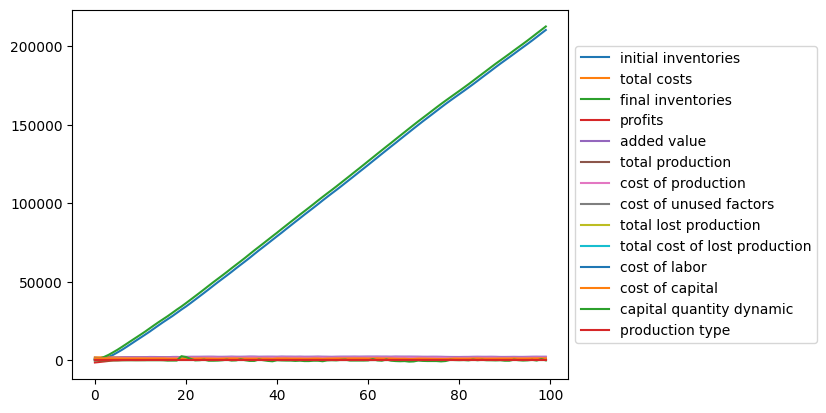

In [20]:
sumOfBalanceSheetSubset.drop(['firm class type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<Axes: >

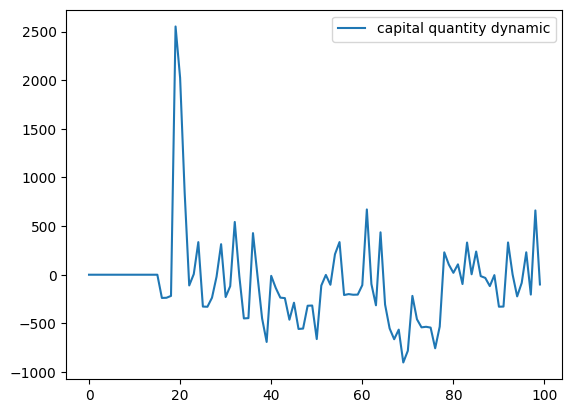

In [21]:
sumOfBalanceSheetSubset[['capital quantity dynamic']].plot()

<Axes: >

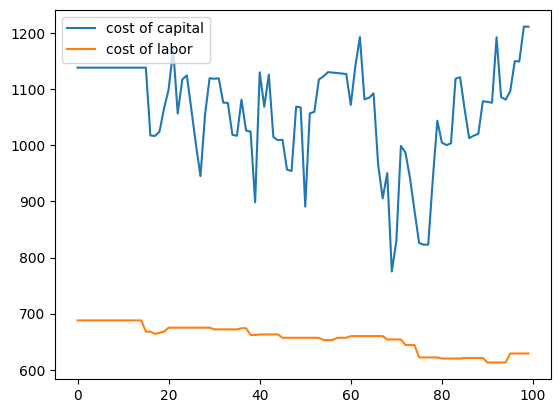

In [22]:
sumOfBalanceSheetSubset[['cost of capital', 'cost of labor']].plot()

# The National Economic Balance Table

In [23]:
allFirmData[['initial inventories', 'added value', 'final inventories']]

,initial inventories,added value,final inventories
0,0.000000,1262.318056,1262.318056
1,1262.318056,2385.656944,3647.975000
2,3647.975000,3160.477778,6808.452778
3,6808.452778,3694.012500,10502.465278
4,10502.465278,3935.305556,14437.770833
5,14437.770833,4145.759722,18583.530556
6,18583.530556,4371.419444,22954.950000
7,22954.950000,4343.583333,27298.533333
8,27298.533333,4437.777778,31736.311111
9,31736.311111,4337.151389,36073.462500
